In [51]:
import json
from dataclasses import dataclass
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
from dacite.core import from_dict
from scipy.signal import argrelextrema, lfilter

In [57]:
input_file_path = "data.json"
output = "result.json"
window = 3

In [53]:
@dataclass
class MeasurementData:
    time: float
    data: float

In [54]:
with open(input_file_path) as file:
    json_data = json.load(file)
    measurements = []
    for entry in json_data:
        measurements.append(from_dict(MeasurementData, entry))

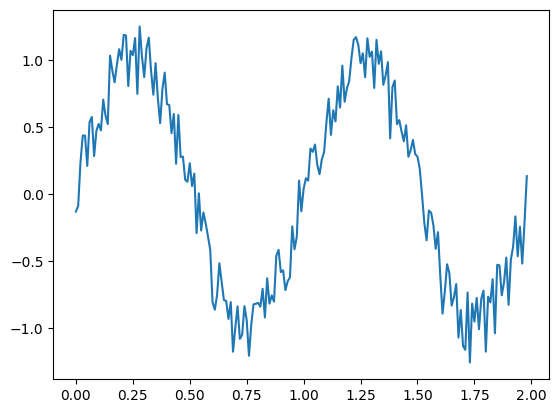

In [55]:
measurement_data = np.array([measurement.data for measurement in measurements])
measurement_times = np.array([measurement.time for measurement in measurements])
plt.plot(measurement_times, measurement_data)

In [ ]:
moving_averages = []

i = 0
# Loop with moving average procedure
while i < len(measurement_data) - window + 3:

    # Calculate the average of current window
    window_average = round(np.sum(measurement_data[i : i + 3]) / 3, 2)

    # Store the average
    moving_averages.append(window_average)

    # Shift window to right by one position
    i += 1

In [ ]:
n = 11
b = [1.0 / n] * n
a = 1
smoothed = lfilter(b, a, measurement_data)
plt.plot(measurement_times, smoothed)

In [58]:
result_index = argrelextrema(np.array(measurement_data), np.greater_equal, order=window)[0]
result_index

array([  6,   7,  14,  15,  20,  24,  25,  30,  31,  38,  42,  43,  52,
        56,  57,  64,  65,  70,  71,  78,  79,  87,  91,  95, 100, 101,
       105, 109, 113, 126, 127, 137, 142, 143, 148, 149, 160, 164, 168,
       169, 178, 179, 183, 190, 191, 196, 197, 202, 206, 210, 211, 222,
       223, 230, 234, 235, 246, 247, 256, 257, 264, 265, 269, 274, 275,
       280, 281, 285, 290, 291, 296, 297, 310, 311, 319, 326, 327, 334,
       335, 339, 344, 345, 352, 353, 358, 359, 366, 370, 371, 378, 379,
       386, 387, 396, 397], dtype=int64)

In [59]:
res_list = [measurements[i] for i in list(result_index)]
res_list

[MeasurementData(time=0.03, data=0.435156573),
 MeasurementData(time=0.03, data=0.435156573),
 MeasurementData(time=0.07, data=0.573943666),
 MeasurementData(time=0.07, data=0.573943666),
 MeasurementData(time=0.1, data=0.521906318),
 MeasurementData(time=0.12, data=0.703009028),
 MeasurementData(time=0.12, data=0.703009028),
 MeasurementData(time=0.15, data=1.030964684),
 MeasurementData(time=0.15, data=1.030964684),
 MeasurementData(time=0.19, data=1.078923086),
 MeasurementData(time=0.21, data=1.186334493),
 MeasurementData(time=0.21, data=1.186334493),
 MeasurementData(time=0.26, data=1.161975169),
 MeasurementData(time=0.28, data=1.248382856),
 MeasurementData(time=0.28, data=1.248382856),
 MeasurementData(time=0.32, data=1.165228549),
 MeasurementData(time=0.32, data=1.165228549),
 MeasurementData(time=0.35, data=0.974910274),
 MeasurementData(time=0.35, data=0.974910274),
 MeasurementData(time=0.39, data=0.904586793),
 MeasurementData(time=0.39, data=0.904586793),
 MeasurementDa

In [60]:

maximas_data = [measurement.data for measurement in res_list]
maximas_time = [measurement.time for measurement in res_list]

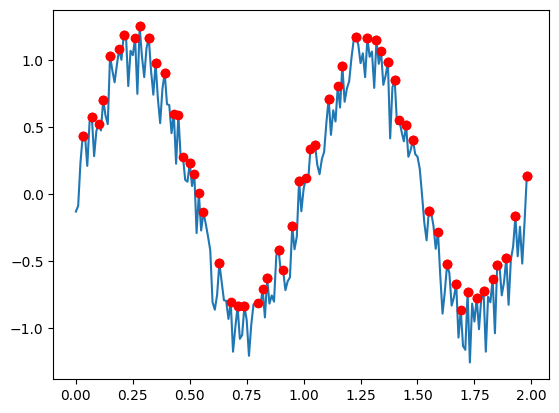

In [61]:
plt.plot(measurement_times, measurement_data)
plt.plot(maximas_time, maximas_data, "o", color="red")